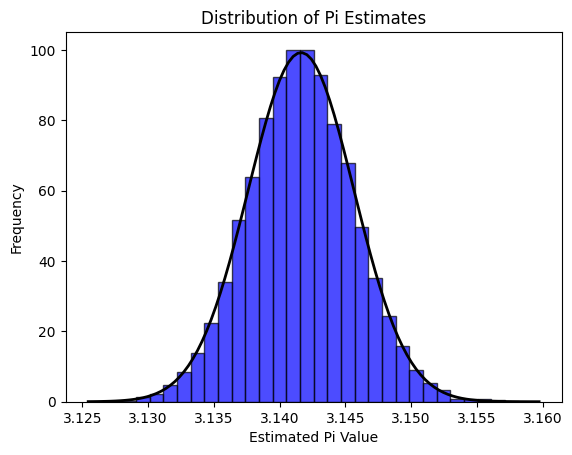

Mean of Pi Estimates: 3.1416354657483456
Standard Deviation of Pi Estimates: 0.004017379480768659


In [48]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def are_coprime(a, b):
    return gcd(a, b) == 1

def estimate_pi(num_trials):
    coprime_count = 0

    for _ in range(num_trials):
        # Roll two 100-sided dice
        die1 = random.randint(1, 1000000)
        die2 = random.randint(1, 1000000)

        # Check if the numbers are coprime
        if are_coprime(die1, die2):
            coprime_count += 1

    # Estimate the value of pi using the relationship P(coprime) = 6/pi^2
    estimated_pi = math.sqrt(6 / (coprime_count / num_trials))

    return estimated_pi

def run_simulation(num_simulations, num_trials):
    pi_estimates = []

    for _ in range(num_simulations):
        estimated_pi = estimate_pi(num_trials)
        pi_estimates.append(estimated_pi)

    return pi_estimates

def plot_distribution(pi_estimates):
    plt.hist(pi_estimates, bins=30, density=True, alpha=0.7, color='b', edgecolor='black')

    # Fit a normal distribution to the data
    mu, std = norm.fit(pi_estimates)

    # Plot the PDF of the fitted distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.title('Distribution of Pi Estimates')
    plt.xlabel('Estimated Pi Value')
    plt.ylabel('Frequency')

    plt.show()

    return mu, std

# Number of simulations and trials
num_simulations = 10000
num_trials = 100000

# Run the simulation
pi_estimates = run_simulation(num_simulations, num_trials)

# Plot the distribution and fit a normal distribution
mean, std_dev = plot_distribution(pi_estimates)

print(f"Mean of Pi Estimates: {mean}")
print(f"Standard Deviation of Pi Estimates: {std_dev}")


In [47]:
import math

def ramanujan_pi(iterations):
    a = 1.0
    b = 1.0 / math.sqrt(2)
    t = 1.0 / 4.0
    p = 1.0

    for _ in range(iterations):
        a_n = (a + b) / 2.0
        b = math.sqrt(a * b)
        t -= p * (a - a_n) * (a - a_n)
        a = a_n
        p *= 2.0

    pi_estimate = (a + b) * (a + b) / (4.0 * t)
    return pi_estimate

# Set the number of iterations (higher iterations yield more accurate results)
iterations = 1000
result = ramanujan_pi(iterations)
print(f"Approximation of pi using {iterations} iterations: {result}")


Approximation of pi using 1000 iterations: 3.141592653589794
